# CS2103 / Lab-03 - Assignment 04 - `18-08-2025`

**Topic**: Bayesian Networks

**Instructions**: Complete all the tasks below and submit your code as a notebook file named `A04.ipynb`

---


# Bayesian Networks

In [ ]:
# Define Bayesian Networks
import networkx as nx
from itertools import product
import matplotlib.pyplot as plt
class BayesNet(nx.DiGraph):
    def __mod__(self, node): return self.nodes[node]['V']
    def __mul__(self, other): n, v = other; self.add_node(n, V=tuple(v), CPT=None); return self
    def __truediv__(self, other): 
        for o in other:  self.remove_node(o); return self
    def __add__(self, other): self.add_edge(*other); return self
    def __sub__(self, other): self.remove_edge(*other); return self
    def __call__(self, node, evi=None): return self.nodes[node]['CPT'] if evi is None else self.nodes[node]['CPT'][evi]
    def __invert__(self,): 
        for n in self.nodes:
            pdn = self.predecessors(n)
            vals = (self)%(n) # set of possible vals
            pvals=[(self)%(p) for p in pdn] # list of sets
            self.nodes[n]['CPT'] = {combo:{k:0.0 for k in vals} for combo in product(*pvals)}
            self.nodes[n]['P'] = tuple(pdn)
        return self
    def check(self, delta=1e-15):
        for n in self.nodes:
            print(f'Node [{n}]') 
            cpt = self.nodes[n]['CPT'] 
            for k, v in cpt.items():
                sumprobs = sum(list(v.values()))
                print(f'\tEvi [{k}], probs={v}, {sumprobs=}, {"✅" if abs(1 - sumprobs) < delta else "⛔"}')
    def plot(self, pos=None, figsize=(5,5), node_color='white', edge_color='black', node_size=500, font_size=10, arrow_size=10, seed=None):
        if not pos: pos = nx.spring_layout(self, seed=seed)
        plt.figure(figsize=figsize)
        nx.draw(self, pos, with_labels=True, node_size=node_size, node_color=node_color, font_size=font_size, font_weight="bold", arrowsize=arrow_size, edgecolors=edge_color,)
        plt.title(f"Nodes={len(self.nodes)} Edges={len(self.edges)}")
        plt.axis("off")
        plt.show()


### [B.1] Holmes Scenario

Consider the Holme’s scenario with binary RVs and their joint distribution given in the table below:

![BN](http://172.30.1.73:2103/p/BNh.png)


Tasks:

* [a] Create a Bayesian Network as shown in the figure and assign the CPT values.

* [b] Find the probability that:
    * The alarm has sounded,
    * Neither a burglary nor an earthquake has occured,
    * Both Watson and Gibbon Call and say they hear the alarm, 
    * There is no radio report of an earthquake.

* [c] Find the probability that:
    * The alarm has not sounded,
    * Neither a burglary nor an earthquake has occured,
    * Neither of Watson and Gibbon is calling,
    * There is no radio report of an earthquake.


In [3]:
# write your code here


NameError: name 'BayesNet' is not defined

In [35]:
#  Define Bayesian Networks
import networkx as nx
from itertools import product
import matplotlib.pyplot as plt
class BayesNet(nx.DiGraph):
    def __mod__(self, node): return self.nodes[node]['V']
    def __mul__(self, other): n, v = other; self.add_node(n, V=tuple(v), CPT=None); return self
    def __truediv__(self, other): 
        for o in other:  self.remove_node(o); return self
    def __add__(self, other): self.add_edge(*other); return self
    def __sub__(self, other): self.remove_edge(*other); return self
    def __call__(self, node, evi=None): return self.nodes[node]['CPT'] if evi is None else self.nodes[node]['CPT'][evi]
    def __invert__(self,): 
        for n in self.nodes:
            pdn = self.predecessors(n)
            vals = (self)%(n) # set of possible vals
            pvals=[(self)%(p) for p in pdn] # list of sets
            self.nodes[n]['CPT'] = {combo:{k:0.0 for k in vals} for combo in product(*pvals)}
            self.nodes[n]['P'] = tuple(pdn)
        return self
    def check(self, delta=1e-15):
        for n in self.nodes:
            print(f'Node [{n}]') 
            cpt = self.nodes[n]['CPT'] 
            for k, v in cpt.items():
                sumprobs = sum(list(v.values()))
                print(f'\tEvi [{k}], probs={v}, {sumprobs=}, {"✅" if abs(1 - sumprobs) < delta else "⛔"}')
    def plot(self, pos=None, figsize=(5,5), node_color='white', edge_color='black', node_size=500, font_size=10, arrow_size=10, seed=None):
        if not pos: pos = nx.spring_layout(self, seed=seed)
        plt.figure(figsize=figsize)
        nx.draw(self, pos, with_labels=True, node_size=node_size, node_color=node_color, font_size=font_size, font_weight="bold", arrowsize=arrow_size, edgecolors=edge_color,)
        plt.title(f"Nodes={len(self.nodes)} Edges={len(self.edges)}")
        plt.axis("off")
        plt.show()

In [36]:
BN=BayesNet()

BN*=["E",("e0","e1")]
BN*=["B",("b0","b1")]
BN*=["R",("r0","r1")]
BN*=["A",("a0","a1")]
BN*=["W",("w0","w1")]
BN*=["G",("g0","g1")]

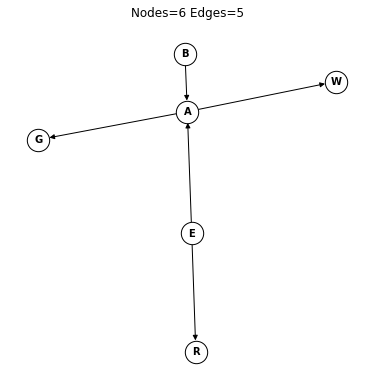

In [37]:
BN+=("E","R")
BN+=("E","A")
BN+=("B","A")
BN+=("A","W")
BN+=("A","G")

BN.plot()


In [38]:
~BN
BN.check()

Node [E]
	Evi [()], probs={'e0': 0.0, 'e1': 0.0}, sumprobs=0.0, ⛔
Node [B]
	Evi [()], probs={'b0': 0.0, 'b1': 0.0}, sumprobs=0.0, ⛔
Node [R]
	Evi [('e0',)], probs={'r0': 0.0, 'r1': 0.0}, sumprobs=0.0, ⛔
	Evi [('e1',)], probs={'r0': 0.0, 'r1': 0.0}, sumprobs=0.0, ⛔
Node [A]
	Evi [('e0', 'b0')], probs={'a0': 0.0, 'a1': 0.0}, sumprobs=0.0, ⛔
	Evi [('e0', 'b1')], probs={'a0': 0.0, 'a1': 0.0}, sumprobs=0.0, ⛔
	Evi [('e1', 'b0')], probs={'a0': 0.0, 'a1': 0.0}, sumprobs=0.0, ⛔
	Evi [('e1', 'b1')], probs={'a0': 0.0, 'a1': 0.0}, sumprobs=0.0, ⛔
Node [W]
	Evi [('a0',)], probs={'w0': 0.0, 'w1': 0.0}, sumprobs=0.0, ⛔
	Evi [('a1',)], probs={'w0': 0.0, 'w1': 0.0}, sumprobs=0.0, ⛔
Node [G]
	Evi [('a0',)], probs={'g0': 0.0, 'g1': 0.0}, sumprobs=0.0, ⛔
	Evi [('a1',)], probs={'g0': 0.0, 'g1': 0.0}, sumprobs=0.0, ⛔


In [39]:
BN("E",())["e0"]=0.9997
BN("E",())["e1"]=0.0003

BN("B",())["b0"]=0.9999
BN("B",())["b1"]=0.0001


BN("R",('e0',))['r0']=0.9998
BN("R",('e0',))['r1']=0.0002
BN("R",('e1',))['r0']=0.1
BN("R",('e1',))['r1']=0.9

BN("A",('e0','b0'))['a0']=0.99
BN("A",('e0','b0'))['a1']=0.01
BN("A",('e0','b1'))['a0']=0.8
BN("A",('e0','b1'))['a1']=0.2
BN("A",('e1','b0'))['a0']=0.05
BN("A",('e1','b0'))['a1']=0.95
BN("A",('e1','b1'))['a0']=0.04
BN("A",('e1','b1'))['a1']=0.96


BN("W",('a0',))['w0']=0.6
BN("W",('a0',))['w1']=0.4
BN("W",('a1',))['w0']=0.8
BN("W",('a1',))['w1']=0.2

BN("G",('a0',))['g0']=0.96
BN("G",('a0',))['g1']=0.04
BN("G",('a1',))['g0']=0.6
BN("G",('a1',))['g1']=0.4


In [40]:
BN.check()

Node [E]
	Evi [()], probs={'e0': 0.9997, 'e1': 0.0003}, sumprobs=1.0, ✅
Node [B]
	Evi [()], probs={'b0': 0.9999, 'b1': 0.0001}, sumprobs=1.0, ✅
Node [R]
	Evi [('e0',)], probs={'r0': 0.9998, 'r1': 0.0002}, sumprobs=1.0, ✅
	Evi [('e1',)], probs={'r0': 0.1, 'r1': 0.9}, sumprobs=1.0, ✅
Node [A]
	Evi [('e0', 'b0')], probs={'a0': 0.99, 'a1': 0.01}, sumprobs=1.0, ✅
	Evi [('e0', 'b1')], probs={'a0': 0.8, 'a1': 0.2}, sumprobs=1.0, ✅
	Evi [('e1', 'b0')], probs={'a0': 0.05, 'a1': 0.95}, sumprobs=1.0, ✅
	Evi [('e1', 'b1')], probs={'a0': 0.04, 'a1': 0.96}, sumprobs=1.0, ✅
Node [W]
	Evi [('a0',)], probs={'w0': 0.6, 'w1': 0.4}, sumprobs=1.0, ✅
	Evi [('a1',)], probs={'w0': 0.8, 'w1': 0.2}, sumprobs=1.0, ✅
Node [G]
	Evi [('a0',)], probs={'g0': 0.96, 'g1': 0.04}, sumprobs=1.0, ✅
	Evi [('a1',)], probs={'g0': 0.6, 'g1': 0.4}, sumprobs=1.0, ✅


In [44]:
# P=P(A|)

KeyError: ('E', 'B')

### [B.2] Review Classification

We have a vocabulary of 10 words 

$V=\{I,loved,the,movie,hated,a,great,poor,acting,good\}$

We are given a labelled dataset of movie reviews containing 5 documents as follows:

* $d_1$: I loved the movie 	(**+**)
* $d_2$: I hated the movie 	(**-**)
* $d_3$: a great movie good movie 	(**+**)
* $d_4$: poor acting 	(**-**)
* $d_5$: great acting a good movie 	(**+**)

Tasks: 

* [a] Build a bayesian network under the assumption that the occurance a word in a document depends only upon the label. Assign CPT to each node. 

* [b] Find the probabilities that the sentence "*I hated the poor acting*" belongs (+) and (-) class.


TypeError: DiGraph.add_edge() takes 3 positional arguments but 6 were given

In [ ]:
# write your code here

---